In [12]:
import numpy as np

In [13]:
w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1,1])
b1 = 3
b2 = -1
b3 = -1

In [14]:
def MLP(x,w,b):
    y =np.sum(w*x) +b
    if y <= 0:
        return 0
    else:
        return 1

In [15]:
def NAND(x1,x2):
    return MLP(np.array([x1,x2]), w11, b1)

def OR(x1,x2):
    return MLP(np.array([x1,x2]), w12, b2)

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

def XOR(x1, x2):
    return AND(NAND(x1, x2,),OR(x1, x2))

if __name__ == '__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y = XOR(x[0], x[1])
        print(' 입력 값 : ' + str(x) + ' 출력 값 : '+ str(y))

 입력 값 : (0, 0) 출력 값 : 0
 입력 값 : (1, 0) 출력 값 : 1
 입력 값 : (0, 1) 출력 값 : 1
 입력 값 : (1, 1) 출력 값 : 0


## tf.keras.layers.Dense

In [16]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [17]:
(X_train, y_train), (X_test, y_train) = load_data()

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

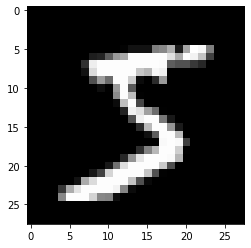

In [19]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [20]:
X_train[0].shape

(28, 28)

In [21]:
len(X_train)

60000

In [22]:
y_train

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
import tensorflow as tf

In [26]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))

model.summary()
sgd = tf.keras.optimizers.SGD(lr=0.1)

model.compile(loss = 'mean_squared_error', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.2870
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0836 - accuracy: 0.4414
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0777 - accuracy: 0.5399
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - accuracy: 0.6162
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0651 - accuracy: 0.6683
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0597 - accuracy: 0.7070
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0552 - accuracy: 0.7375
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.7650
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0484 - accuracy: 0.7826
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.7981
Epoch 11/2

In [29]:
result = model.predict(X_test)[0]

ValueError: in user code:

    File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)


In [32]:
for i in result:
    print(':.9f'.format(i, '.9f'))

NameError: name 'result' is not defined